# check oof df

In [1]:
import os

import numpy as np
import pandas as pd
from pandarallel import pandarallel
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
output_dir = os.path.join("/kaggle", "working")
exp_name = "debug"
oof_df_path = os.path.join(output_dir, exp_name,"oof_df.csv")
oof_df = pd.read_csv(oof_df_path)

In [4]:
oof_df.columns

Index(['series_id', 'series_date_key', 'timestamp', 'date', 'time', 'step',
       'anglez', 'enmo', 'event', 'event_onset', 'event_wakeup', 'class_pred',
       'event_onset_pred', 'event_wakeup_pred', 'class_target',
       'event_onset_target', 'event_wakeup_target'],
      dtype='object')

In [5]:
oof_df.head()

,series_id,series_date_key,timestamp,date,time,step,anglez,enmo,event,event_onset,event_wakeup,class_pred,event_onset_pred,event_wakeup_pred,class_target,event_onset_target,event_wakeup_target
0,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:00,2018-03-13,13:15:00,0,-87.8053,0.0227,0.0,0,0,0.463988,0.0,0.000000,0.0,0.0,0.0
1,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:05,2018-03-13,13:15:05,1,-87.8038,0.0224,0.0,0,0,0.539626,0.0,0.496835,0.0,0.0,0.0
2,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:10,2018-03-13,13:15:10,2,-87.7989,0.0225,0.0,0,0,0.487879,0.0,0.000000,0.0,0.0,0.0
3,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:15,2018-03-13,13:15:15,3,-87.8048,0.0232,0.0,0,0,0.454450,0.0,0.000000,0.0,0.0,0.0
4,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:20,2018-03-13,13:15:20,4,-87.7999,0.0232,0.0,0,0,0.470827,0.0,0.000000,0.0,0.0,0.0


In [6]:
oof_df = oof_df[oof_df["series_date_key"]=="1087d7b0ff2e_2018-03-13"]
print(len(oof_df))

77400


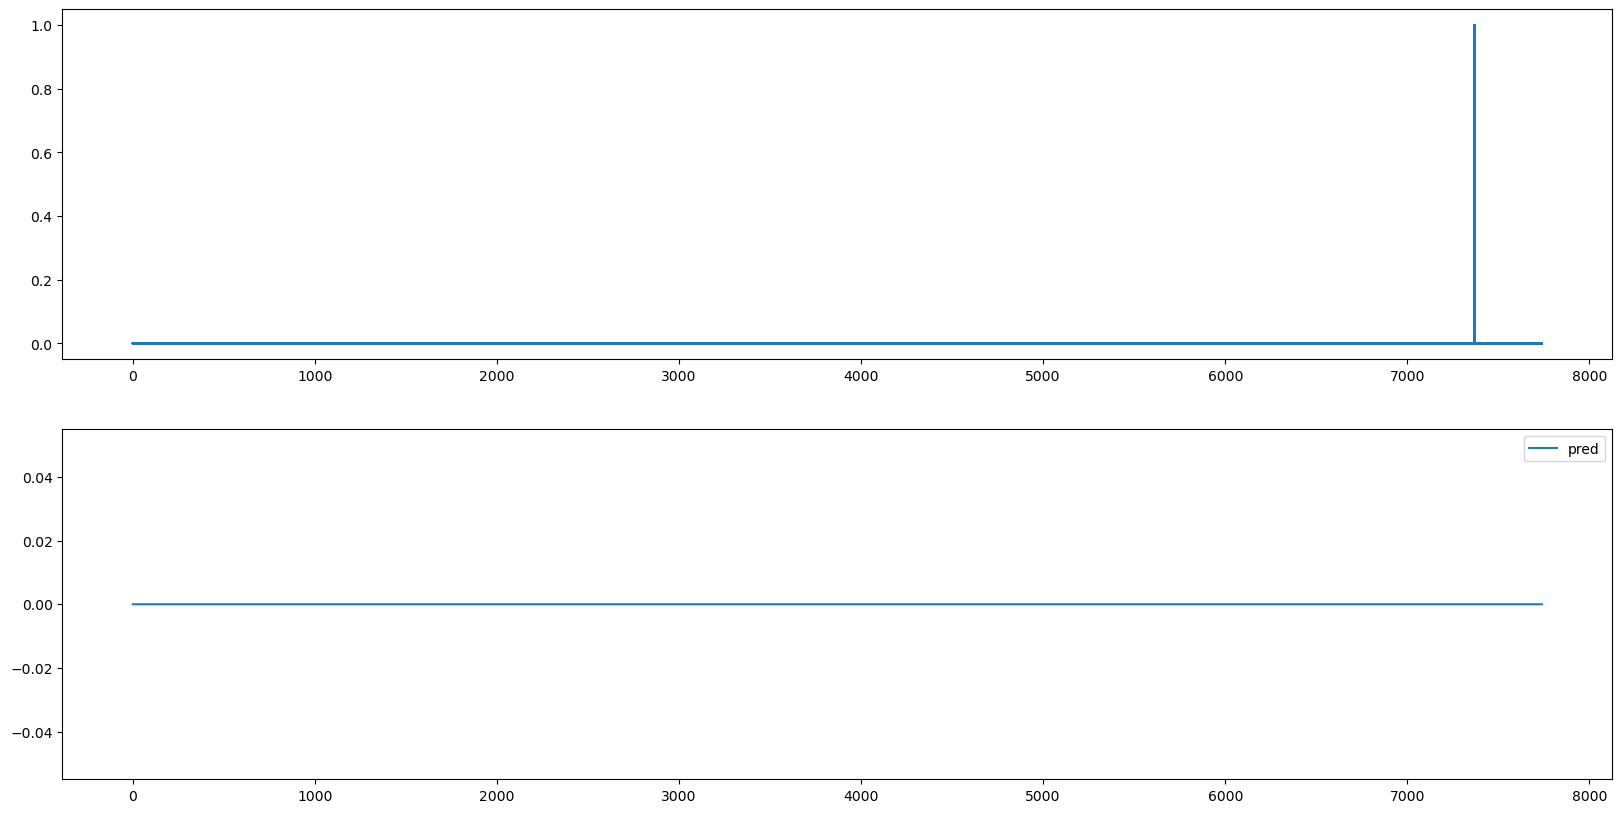

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(oof_df["step"], oof_df["event_onset"], label="label")
plt.subplot(2, 1, 2)
plt.plot(oof_df["step"], oof_df["event_onset_pred"], label="pred")
plt.legend()

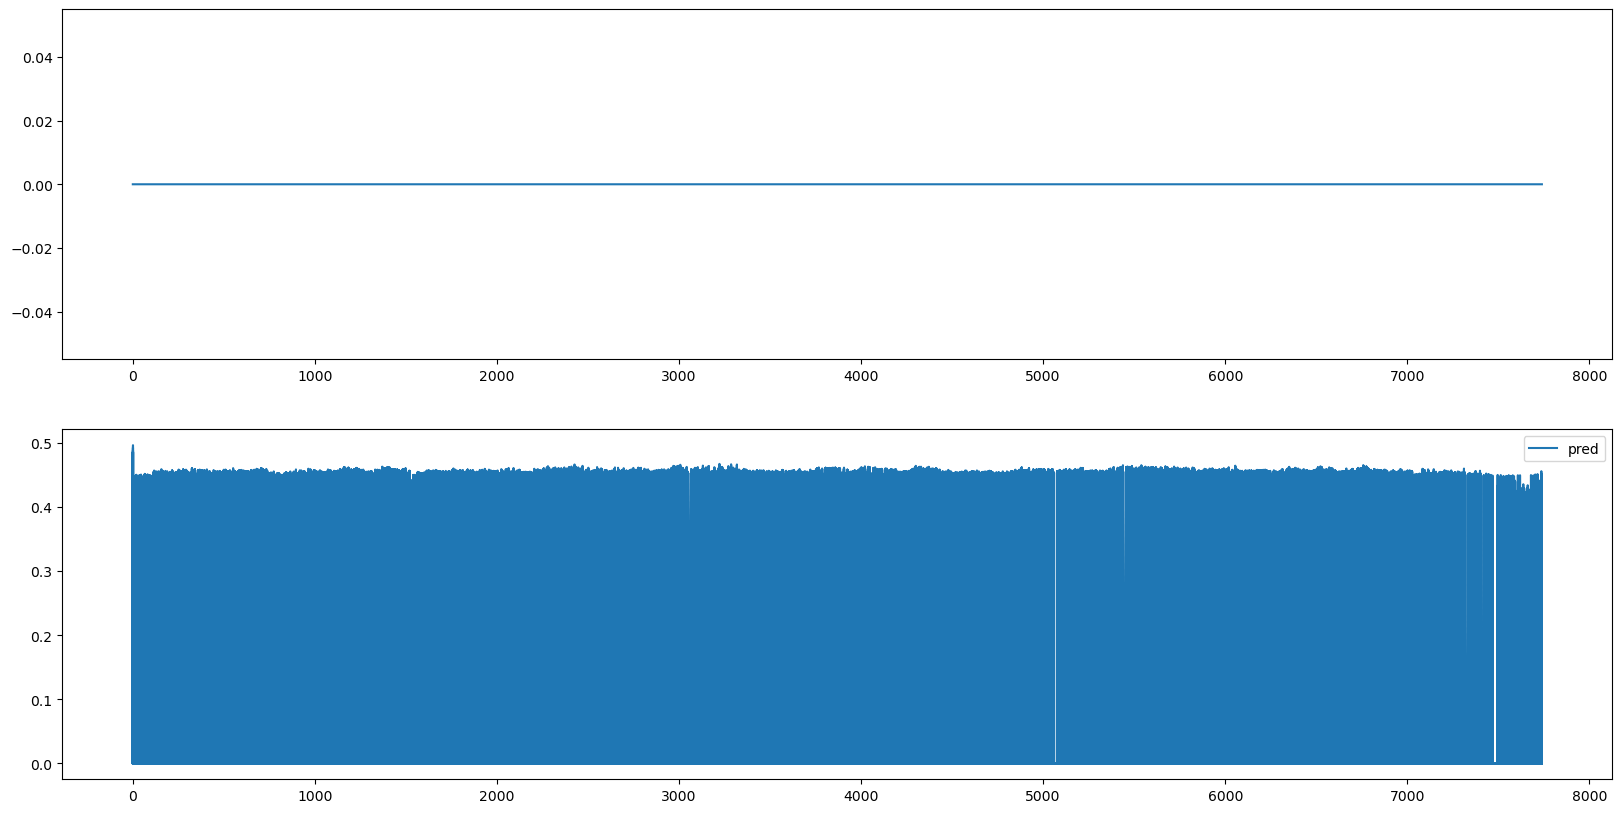

In [14]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(oof_df["step"], oof_df["event_wakeup"], label="label")
plt.subplot(2, 1, 2)
plt.plot(oof_df["step"], oof_df["event_wakeup_pred"], label="pred")
plt.legend()

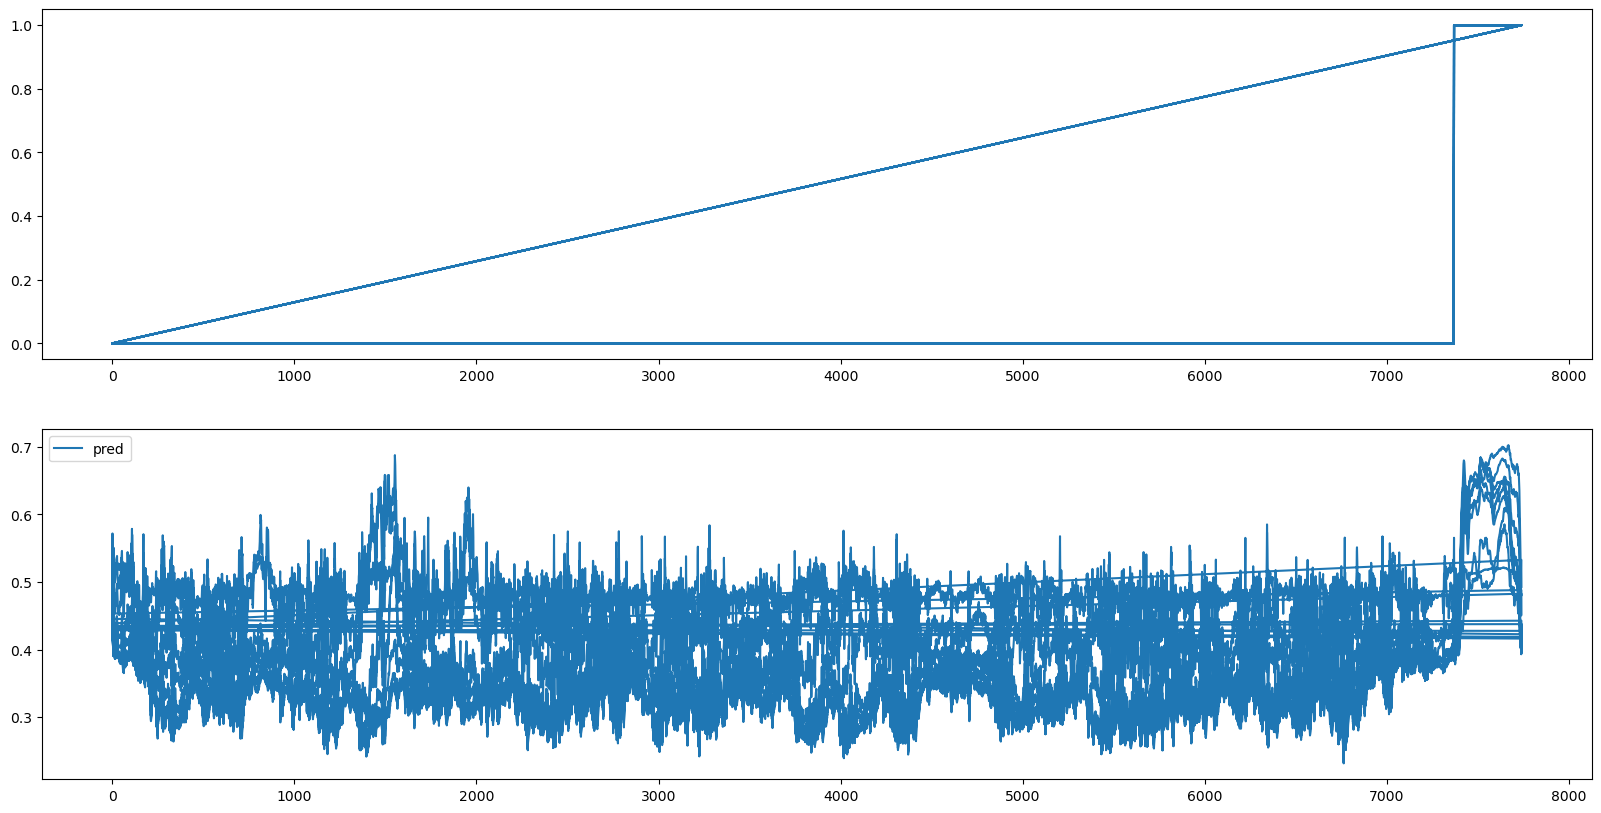

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(oof_df["step"], oof_df["class_target"], label="label")
plt.subplot(2, 1, 2)
plt.plot(oof_df["step"], oof_df["class_pred"], label="pred")
plt.legend()

In [17]:
oof_df["step"].value_counts()

0       10
5200    10
5168    10
5167    10
5166    10
        ..
2575    10
2574    10
2573    10
2572    10
7739    10
Name: step, Length: 7740, dtype: int64

stepがうまくい切れずデータが重なってしまっている。